## Neural Network Classification with TensorFlow

In [1]:
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

### 1. Data preparation

In [2]:
sample_number = 1000

x, y = make_circles(sample_number, noise = 0.03,
    random_state = 42)

In [3]:
circle = pd.DataFrame({"x0": x[:, 0], "x1": x[:, 1], "label": y})

circle.head()

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [4]:
circle.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

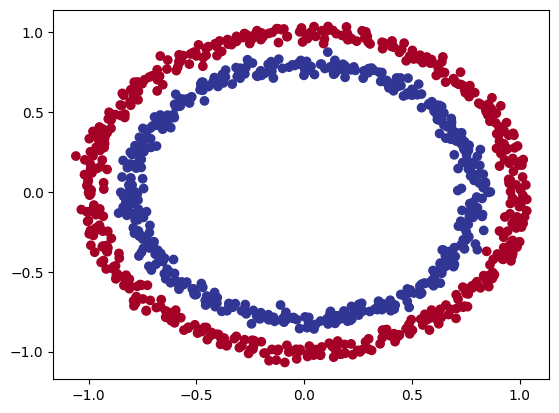

In [5]:
plt.scatter(x[:, 0], x[:, 1], c = y, cmap = plt.cm.RdYlBu);

In [6]:
x.shape, y.shape, len(x), len(y)

((1000, 2), (1000,), 1000, 1000)

In [7]:
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### 2. Model building

In [8]:
tf.random.set_seed(42)

first_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

first_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(), metrics = ['accuracy'])

### set build with input shape to prevent error for 'model has not yet been built'
### choose 2 because we have 2 features
first_model.build((None, 2))
first_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
first_model_history = first_model.fit(x, y, epochs = 5)

first_model.evaluate(x, y)

Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 5.2759 - accuracy: 0.4770
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 5.0588 - accuracy: 0.4830
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 3.7788 - accuracy: 0.5050
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7976 - accuracy: 0.4950
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7052 - accuracy: 0.4990


[0.7052005529403687, 0.49900001287460327]

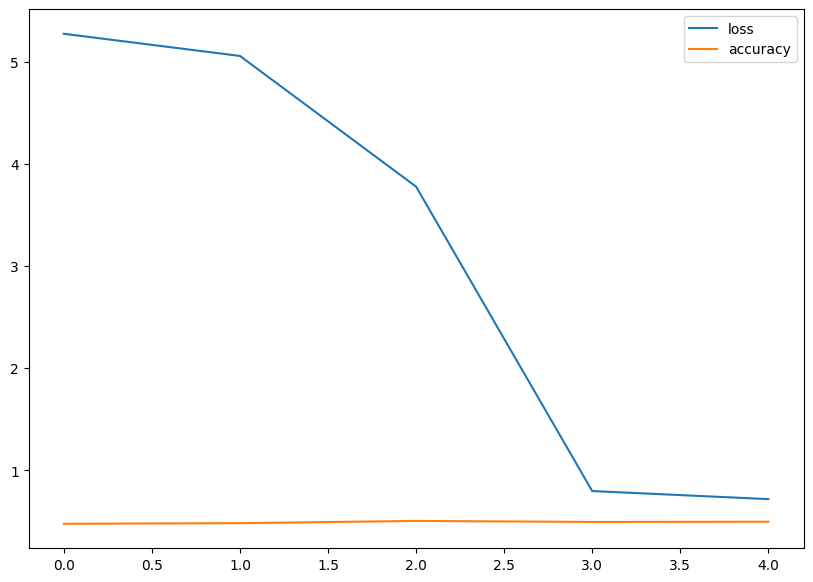

In [10]:
pd.DataFrame(first_model_history.history).plot(figsize = (10, 7));

In [11]:
first_model_history = first_model.fit(x, y, epochs = 200, verbose = 0)

first_model.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

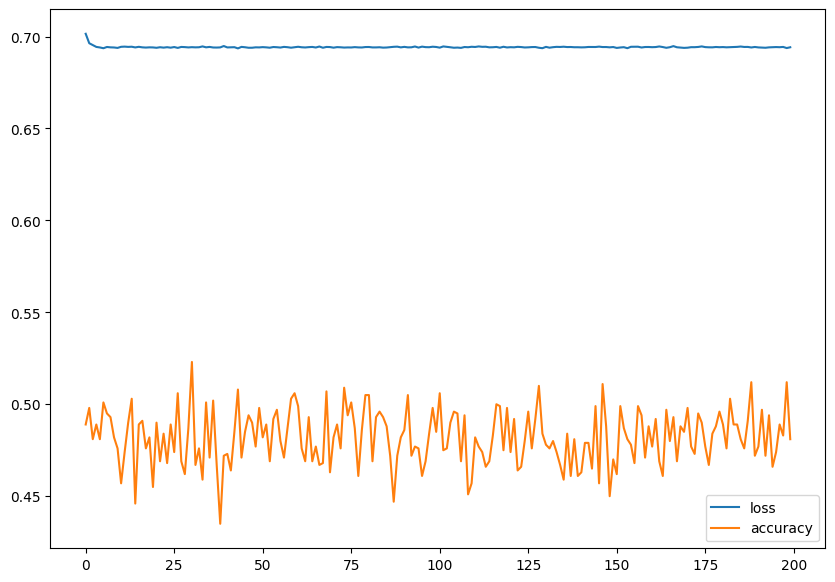

In [12]:
pd.DataFrame(first_model_history.history).plot(figsize = (10, 7));

In [13]:
tf.random.set_seed(42)

second_model = tf.keras.Sequential([
    ### add extra layer
    tf.keras.layers.Dense(1), 
    tf.keras.layers.Dense(1)
])

second_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(), metrics = ['accuracy'])

second_model.build((None, 2))
second_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
second_model_history = second_model.fit(x, y, epochs = 100, verbose = 0)

second_model.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932563185691833, 0.5]

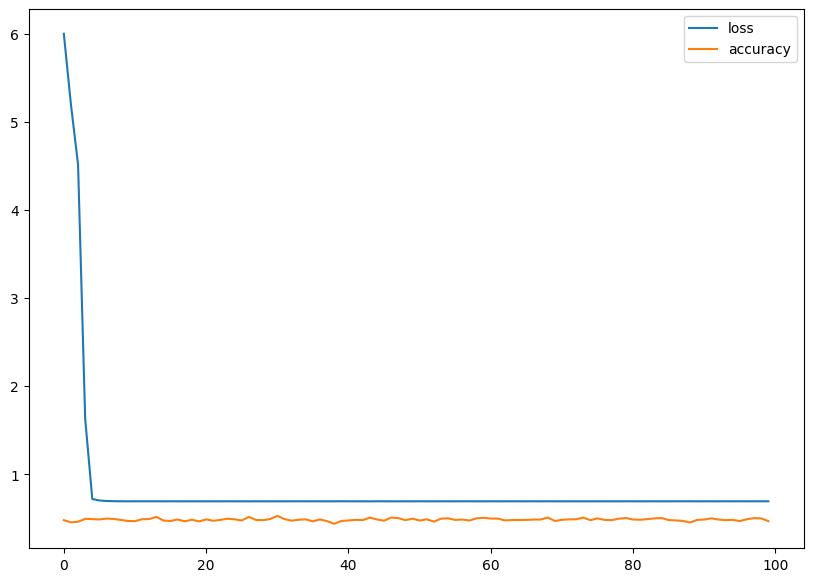

In [15]:
pd.DataFrame(second_model_history.history).plot(figsize = (10, 7));

In [16]:
tf.random.set_seed(42)

third_model = tf.keras.Sequential([
    ### add layer with 100 unit neuron
    tf.keras.layers.Dense(100),
    ### add layer with 10 unit neuron
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

third_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

third_model.build((None, 2))
third_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
third_model_history = third_model.fit(x, y, epochs = 100, verbose = 0)

third_model.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4920


[0.6933580636978149, 0.492000013589859]

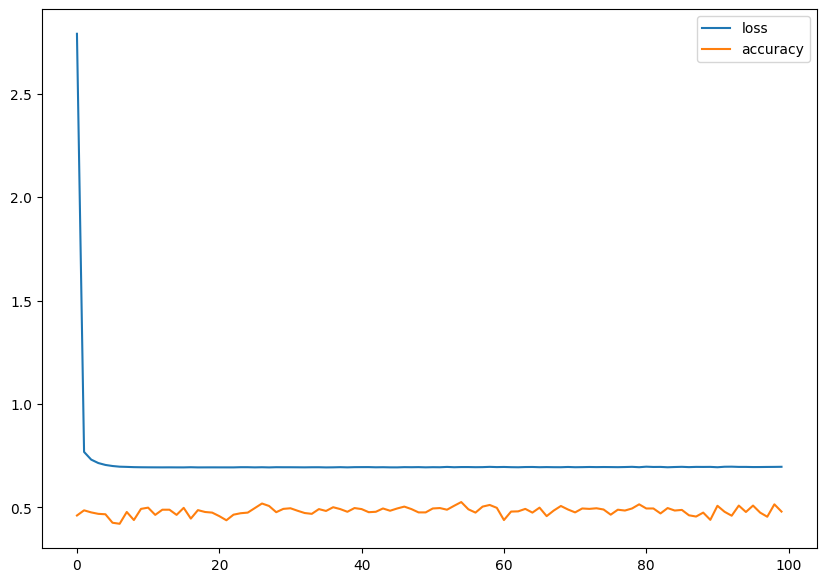

In [18]:
pd.DataFrame(third_model_history.history).plot(figsize = (10, 7));

In [19]:
x_train, y_train = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]

In [20]:
tf.random.set_seed(42)

tenth_model = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(1, activation = "sigmoid")
])

tenth_model.compile(loss = "binary_crossentropy", optimizer = "Adam",
    metrics = ["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))

tenth_model_history = tenth_model.fit(x_train, y_train,
    epochs = 100, callbacks = [lr_scheduler], verbose = 0)

Take the learning rate value where the loss is still decreasing but not quite flattened out, 10x smaller than the bottom of the curve.

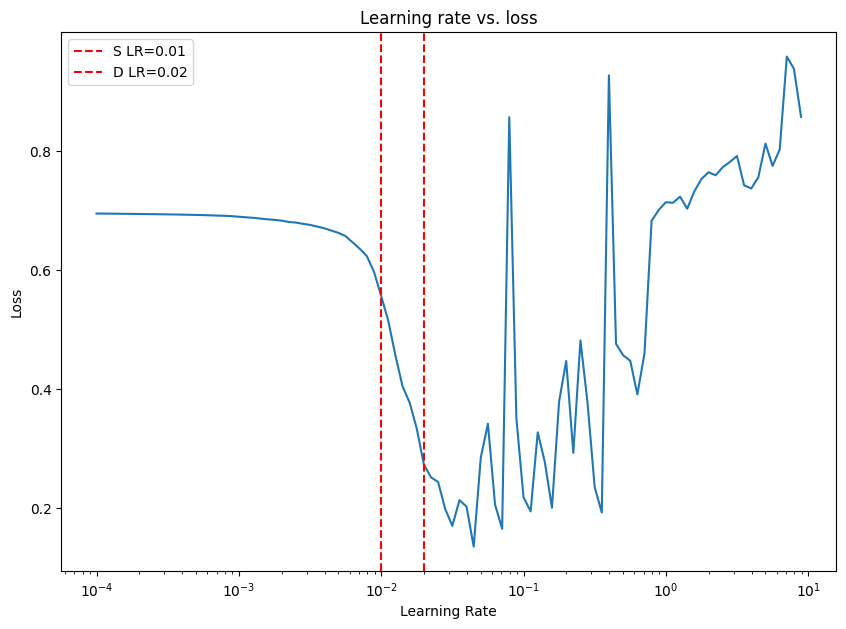

In [21]:
lrs = 1e-4 * (10 ** (np.arange(100) / 20))

plt.figure(figsize = (10, 7))
plt.semilogx(lrs, tenth_model_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")
start_lr = 0.01
desired_lr = 0.02
plt.axvline(x = start_lr, color = 'r', linestyle = '--', label = f'S LR={start_lr}')
plt.axvline(x = desired_lr, color = 'r', linestyle = '--', label = f'D LR={desired_lr}')
plt.legend()
plt.show();

Learning rate scheduler

Introduce decay to alleviate the effects of overfitting and increase accuracy of classification. 

1. Time-based scheduler that gradually decrease based on epoch number.
2. Step-based learning rate scheduler that systematically drop the learning rate after specific epochs during training.
3. Linear and polynomial learning rate schedules where learning rate is decayed to zero over a fixed number of epochs.

https://pyimagesearch.com/2019/07/22/keras-learning-rate-schedules-and-decay/

Time-based scheduler formula

In [118]:
initial_lr = 0.01
total_epoch = 40
decay = 0.01 / total_epoch

total_sample = 50000
batch_size = 64

step = total_sample / batch_size

x = range(0, total_epoch)

for epoch in x:
    learning_rate = initial_lr / (1.0 + (decay * (step * epoch)))
    print(learning_rate)

0.01
0.008366013071895426
0.0071910112359550565
0.006305418719211823
0.005614035087719299
0.005059288537549407
0.00460431654676259
0.004224422442244224
0.003902439024390244
0.0036260623229461757
0.0033862433862433864
0.003176178660049628
0.0029906542056074765
0.00282560706401766
0.002677824267782427
0.002544731610337972
0.0024242424242424242
0.0023146473779385173
0.0022145328719723185
0.0021227197346600332
0.0020382165605095544
0.0019601837672281776
0.0018879056047197641
0.0018207681365576102
0.0017582417582417582
0.001699867197875166
0.0016452442159383034
0.0015940224159402242
0.0015458937198067632
0.0015005861664712779
0.001457858769931663
0.00141749723145072
0.0013793103448275863
0.0013431269674711438
0.0013087934560327198
0.0012761714855433698
0.001245136186770428
0.0012155745489078823
0.0011873840445269018
0.0011604714415231188
